In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from env import host, user, password

# 1. Acquire

In [2]:
def get_db_url(host, username, password, database):
    return f'mysql+pymysql://{username}:{password}@{host}/{database}'

In [3]:
database = 'zillow'

url = get_db_url(host, user, password, database)

In [4]:
query = '''
        SELECT prop.*,
        predictions_2017.logerror,
        predictions_2017.transactiondate,
        air.airconditioningdesc,
        arch.architecturalstyledesc,
        build.buildingclassdesc,
        heat.heatingorsystemdesc,
        land.propertylandusedesc,
        story.storydesc,
        type.typeconstructiondesc
        FROM properties_2017 prop
        JOIN (
            SELECT parcelid, MAX(transactiondate) AS max_transactiondate
            FROM predictions_2017
            GROUP BY parcelid
            ) pred USING(parcelid)
        JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
                          AND pred.max_transactiondate = predictions_2017.transactiondate
        LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
        LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
        LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
        LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
        LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
        LEFT JOIN storytype story USING(storytypeid)
        LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
        WHERE propertylandusedesc = "Single Family Residential"
            AND transactiondate <= '2017-12-31'
            AND prop.longitude IS NOT NULL
            AND prop.latitude IS NOT NULL
        '''

In [5]:
df = pd.read_sql(query, url)

df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,None,None,Central,Single Family Residential,None,None


# 2. Summarize 

### (summary stats, info, dtypes, shape, distrubutions, value_counts, etc.)

In [8]:
# summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52319.0,1.496888e+06,8.594310e+05,3.490000e+02,7.575810e+05,1.500095e+06,2.241248e+06,2.982270e+06
parcelid,52319.0,1.299682e+07,3.350951e+06,1.071186e+07,1.151017e+07,1.257825e+07,1.413036e+07,1.676878e+08
airconditioningtypeid,13615.0,2.439589e+00,3.847925e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52319.0,2.300015e+00,1.022816e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52319.0,3.300770e+00,9.475632e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingqualitytypeid,33654.0,6.264961e+00,1.716328e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52184.0,2.305276e+00,1.018076e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
decktypeid,389.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


In [9]:
# column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [6]:
# shape of the df
df.shape

(52319, 68)

(-1.0, 1.0)

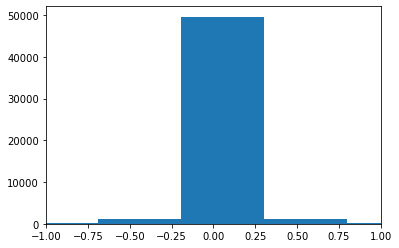

In [11]:
# distrubution of the target variable
plt.hist(x=df['logerror'], bins=20)
plt.xlim(-1,1)

In [12]:
# value counts of the poolcnt column
df['poolcnt'].value_counts()

1.0    11077
Name: poolcnt, dtype: int64

# 3. 
Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [7]:
# define function to calculate number of nulls and percent of nulls and return a new df
def null_counter(df):
    
    new_columns = ['name', 'num_rows_missing', 'pct_rows_missing']
    
    new_df = pd.DataFrame(columns = new_columns)
    
    for col in list(df.columns):
        num_missing = df[col].isna().sum()
        pct_missing = num_missing / df.shape[0]
        
        add_df = pd.DataFrame([{'name':col, 'num_rows_missing':num_missing, 'pct_rows_missing':pct_missing}])
        
        new_df = pd.concat([new_df, add_df], axis = 0)
        
    new_df.set_index('name', inplace=True)
    
    return new_df

In [8]:
null_df = null_counter(df)

In [9]:
null_df.head()

,num_rows_missing,pct_rows_missing
name,,
id,0,0.0
parcelid,0,0.0
airconditioningtypeid,38704,0.739769
architecturalstyletypeid,52249,0.998662
basementsqft,52272,0.999102


In [10]:
null_df.shape

(68, 2)

# Prepare

## 1. 
Remove any properties that are likely to be something other than single unit propertis. 

In [11]:
#Maybe there are some houses with no square footage?
df[df['calculatedfinishedsquarefeet'] == 0]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [12]:
#What about nonexistent lots?
df[df['lotsizesquarefeet'] == 0]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [13]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [14]:
# verify land use type
df.propertylandusedesc.value_counts()

Single Family Residential    52319
Name: propertylandusedesc, dtype: int64

In [15]:
# does architectural style provide something useful?
df.architecturalstyledesc.value_counts()

Contemporary     62
Cape Cod          3
Bungalow          2
Ranch/Rambler     2
Conventional      1
Name: architecturalstyledesc, dtype: int64

In [16]:
# how about unitcnt?
df.unitcnt.value_counts()

1.0    33733
2.0       27
3.0        1
Name: unitcnt, dtype: int64

Looks like there are some properties with more than one unit. These will have to be removed.

In [21]:
df.unitcnt[df.unitcnt == 2.0]

974      2.0
1678     2.0
2867     2.0
4971     2.0
5707     2.0
6385     2.0
13977    2.0
14713    2.0
15415    2.0
20325    2.0
22012    2.0
25527    2.0
25968    2.0
26165    2.0
29445    2.0
33294    2.0
34376    2.0
35685    2.0
36452    2.0
37199    2.0
39305    2.0
40480    2.0
40921    2.0
41185    2.0
42008    2.0
42329    2.0
49733    2.0
Name: unitcnt, dtype: float64

In [23]:
df[df.unitcnt == 2.0]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
974,929591,11800566,NaN,NaN,NaN,2.0,2.0,None,5.0,2.0,...,6.037204e+13,-0.012238,2017-01-08,None,None,None,None,Single Family Residential,None,None
1678,632272,12028481,NaN,NaN,NaN,4.0,4.0,None,5.0,4.0,...,6.037190e+13,-0.108106,2017-01-12,None,None,None,None,Single Family Residential,None,None
2867,2347709,12187943,NaN,NaN,NaN,3.0,6.0,None,6.0,3.0,...,6.037533e+13,0.222066,2017-01-20,None,None,None,Floor/Wall,Single Family Residential,None,None
4971,721769,12010695,NaN,NaN,NaN,2.0,4.0,None,4.0,2.0,...,6.037191e+13,0.234973,2017-02-01,None,None,None,None,Single Family Residential,None,None
5707,1764673,11645106,1.0,NaN,NaN,18.0,14.0,None,12.0,18.0,...,6.037262e+13,0.448665,2017-02-08,Central,None,None,Central,Single Family Residential,None,None
6385,1704652,11547730,NaN,NaN,NaN,2.0,3.0,None,5.0,2.0,...,6.037273e+13,-0.099913,2017-02-14,None,None,None,None,Single Family Residential,None,None
13977,551751,11528841,NaN,NaN,NaN,4.0,5.0,None,4.0,4.0,...,NaN,-0.735820,2017-03-28,None,None,None,Floor/Wall,Single Family Residential,None,None
14713,1222147,12075228,NaN,NaN,NaN,3.0,4.0,None,7.0,3.0,...,6.037461e+13,0.025495,2017-03-30,None,None,None,Central,Single Family Residential,None,None
15415,2832823,11265019,1.0,NaN,NaN,6.0,7.0,None,9.0,6.0,...,6.037901e+13,0.061918,2017-04-03,Central,None,None,Central,Single Family Residential,None,None
20325,1258669,11997656,NaN,NaN,NaN,2.0,3.0,None,4.0,2.0,...,6.037192e+13,-0.016671,2017-04-27,None,None,None,Floor/Wall,Single Family Residential,None,None


In [30]:
df[df.unitcnt == 2.0].index

Int64Index([  974,  1678,  2867,  4971,  5707,  6385, 13977, 14713, 15415,
            20325, 22012, 25527, 25968, 26165, 29445, 33294, 34376, 35685,
            36452, 37199, 39305, 40480, 40921, 41185, 42008, 42329, 49733],
           dtype='int64')

In [31]:
df = df.drop(df[df.unitcnt == 2.0].index)

In [32]:
df.shape

(52292, 68)

In [36]:
df.unitcnt[df.unitcnt == 3.0]

Series([], Name: unitcnt, dtype: float64)

In [33]:
df.unitcnt[df.unitcnt == 3.0].index

Int64Index([10712], dtype='int64')

In [34]:
df = df.drop(df[df.unitcnt == 3.0].index)

In [35]:
df.shape

(52291, 68)

## 2. 
Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).



In [37]:
# define function which drops columns and rows based on the proportion of nulls
def null_dropper(df, prop_required_col, prop_required_row):
    
    prop_null_col = 1 - prop_required_col
    
    for col in list(df.columns):
        
        null_sum = df[col].isna().sum()
        null_pct = null_sum / df.shape[0]
        
        if null_pct > prop_null_col:
            df.drop(columns=col, inplace=True)
            
    row_threshold = int(prop_required_row * df.shape[1])
        
    df.dropna(axis = 0, thresh=row_threshold, inplace=True)
    
    return df

In [38]:
clean_df = null_dropper(df, 0.75, .075)

In [39]:
clean_df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


In [40]:
clean_df.shape

(52291, 29)

In [41]:
# save a copy of the clean csv to my local machine
# clean_df.to_csv('zillow.csv')

# Mall customers

## 1. Acquire

In [42]:
mall_query = '''
            SELECT * 
            FROM customers
            '''

In [43]:
mall_database = 'mall_customers'

mall_url = get_db_url(host, user, password, mall_database)

In [44]:
mall_df = pd.read_sql(mall_query, mall_url)

In [45]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Summarize

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

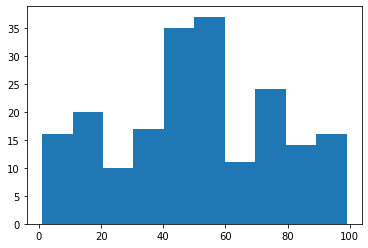

In [46]:
# distributino of targte variable
plt.hist(mall_df['spending_score'])

In [47]:
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [48]:
mall_df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

## 3. Detect outliers using IQR

In [49]:
# see the quantiles for ages
mall_df['age'].quantile([.25, .75])

0.25    28.75
0.75    49.00
Name: age, dtype: float64

In [50]:
age_q1, age_q3 = mall_df['age'].quantile([.25, .75])

In [51]:
# calculate the IQR
age_iqr = age_q3 - age_q1

In [52]:
age_iqr

20.25

In [53]:
# calculate upper and lower bounds based on a k value of 1.5
age_upper = age_q3 + (age_iqr * 1.5)
age_lower = age_q1 - (age_iqr * 1.5)

age_upper, age_lower

(79.375, -1.625)

In [54]:
# check for outliers in the age column
mall_df[mall_df['age'] > age_upper]

,customer_id,gender,age,annual_income,spending_score


## 4. Split date

In [55]:
seed = 123

mall_train, test_val = train_test_split(mall_df, train_size = 0.7, random_state = seed)

mall_test, mall_val = train_test_split(test_val, train_size = 0.5, random_state = seed)

mall_train.shape, mall_val.shape, mall_test.shape

((140, 5), (30, 5), (30, 5))

## 5. Encode categorical columns using a one hot encoder

In [56]:
# check to make sure pd.get_dummies works as expected
pd.get_dummies(mall_train)

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
81,82,38,54,55,0,1
107,108,54,63,46,0,1
112,113,38,64,42,1,0
145,146,28,77,97,0,1
8,9,64,19,3,0,1
...,...,...,...,...,...,...
17,18,20,21,66,0,1
98,99,48,61,42,0,1
66,67,43,48,50,1,0
126,127,43,71,35,0,1


In [57]:
# create the df with dummies for gender and drop the redundant column
mall_train = pd.get_dummies(mall_train)

mall_train.drop(columns=['gender_Female'], inplace=True)

mall_train.head()

,customer_id,age,annual_income,spending_score,gender_Male
81,82,38,54,55,1
107,108,54,63,46,1
112,113,38,64,42,0
145,146,28,77,97,1
8,9,64,19,3,1


## 6. Handle missing values

In [58]:
# check for missing values
mall_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 81 to 109
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     140 non-null    int64
 1   age             140 non-null    int64
 2   annual_income   140 non-null    int64
 3   spending_score  140 non-null    int64
 4   gender_Male     140 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 5.6 KB


## 7. Scale

In [62]:
mms = MinMaxScaler()

mall_train[['age', 'annual_income']] = mms.fit_transform(mall_train[['age', 'annual_income']])

mall_train.head()

,customer_id,age,annual_income,spending_score,gender_Male
81,82,0.384615,0.319672,55,1
107,108,0.692308,0.393443,46,1
112,113,0.384615,0.401639,42,0
145,146,0.192308,0.508197,97,1
8,9,0.884615,0.032787,3,1
